In [1]:
import sys
!{sys.executable} -m pip  install --quiet python-snappy pyarrow memray pandas watermark ipywidgets bs4 polars rich humanize matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


Inspired by [Peter's notebook here](https://colab.research.google.com/drive/1TWa9L5NQE-cBYOpFvzwSu7Rjoy6QtFWw#scrollTo=OTEolvIk4Cmb)

In [5]:
%load_ext memray

In [ ]:
import polars as pl

df = pl.scan_parquet("/Users/vicki/Downloads/spark-3.3.1-bin-hadoop3/goodreads_schema.parquet")

In [1]:
df

NameError: name 'df' is not defined

In [34]:
# total memory allocated for DF
latest_file = max(Path("memray-results/").glob("**/*.html"), key=os.path.getmtime)
soup = BeautifulSoup(latest_file.read_text())
stats = soup.find("div", {"id" : "statsModal"}).find("div", {"class" : "modal-body"})
print(stats.text)

Command line: /usr/local/lib/python3.9/site-packages/ipykernel_launcher.py -f 
/Users/vicki/Library/Jupyter/runtime/kernel-87e391e0-0452-4dc9-bbd9-48ccec32f39e.json
          Start time: 2023-01-12 16:30:36.757000
          End time: 2023-01-12 16:32:20.668000
          Total number of allocations: 12185306
          Total number of frames seen: 115
          Peak memory usage: 45.3 GB
          Python allocator: pymalloc

In [2]:
histo = df_pyarrow.groupby('publication_year').size()
plt.figure();
histo.plot.bar(); plt.axhline(0, color='k')

NameError: name 'df_pyarrow' is not defined

In [23]:
%%memray_flamegraph
df_parquet = pd.read_parquet('/Users/vicki/Downloads/spark-3.3.1-bin-hadoop3/goodreads_schema.parquet', engine='pyarrow')

Output()

Output()

Results saved to memray-results/tmpw84d73e5/flamegraph.html

In [25]:
df_parquet.dtypes

asin                    object
authors                 object
average_rating          object
book_id                 object
country_code            object
description             object
edition_information     object
format                  object
image_url               object
is_ebook                object
isbn                    object
isbn13                  object
kindle_asin             object
language_code           object
link                    object
num_pages               object
popular_shelves         object
publication_day         object
publication_month       object
publication_year        object
publisher               object
ratings_count           object
series                  object
similar_books           object
text_reviews_count      object
title                   object
title_without_series    object
url                     object
work_id                 object
dtype: object

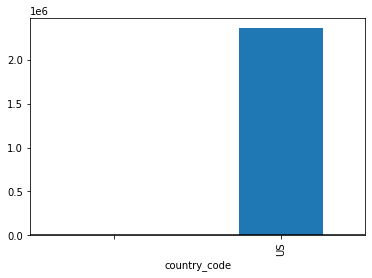

In [16]:
import matplotlib.pyplot as plt


histo = df_parquet.groupby('country_code').size()
plt.figure();
histo.plot.bar(); plt.axhline(0, color='k')

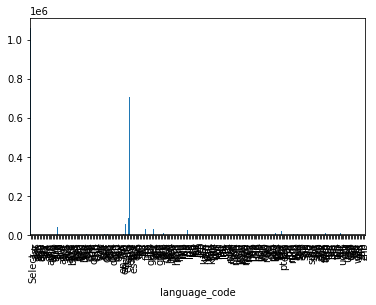

In [18]:
histo = df_parquet.groupby('language_code').size()
plt.figure();
histo.plot.bar(); plt.axhline(0, color='k')